In [34]:
import numpy as np
import matplotlib.pyplot as plt

#step 1:  simulate tosses

longestRun=np.zeros(1000) #creates an array with 1000 slots

flipvalues = [4, 8, 16, 32, 64, 128, 256, 512, 1024]
list_obs_avg=np.array([])
list_obs_var=np.array([])
for flip in flipvalues: #Setting our simultation to flip four different coints
  for sim in range(1000): #setting a simulation to run 1000 times
    #step 1:  flip some coins
    result="" #creating an empty list to place results in
    for i in range(flip): #sets an interger with a range of 1-4 to set four rolls
      value=np.random.randint(0,2) #creates a value (0 or 1) which we can use to assign heads and tails for flips
      if(value==0): #if a 0 is rolled
        result=result+"H" #we add a head flip
      else:
        result=result+"T" #if the result is a 1 we add a tail flip

    #step2 starts here
    #what is the longest run in the string result?
    runCount=np.array([]) #creates an empty array titled run count
    oldToss=result[0] #sets and initial coin toss labelled oldtoss
    count=1
    for i in range(flip): #sets an interger with a range of 1-4 to set four rolls
      newToss=result[i] #The results of i are saved as term newToss
      if newToss==oldToss: #if the results are identical to the previous flip
        count=count+1 #we add 1 to our count
        #increase the run length
      if newToss!=oldToss: #if the results are not identical to the previous flip
        runCount=np.append(runCount,[count]) #saves the runcount and ends it
        oldToss=result[i] #resets the oldcount to the new flip
        count=1 #resets counts
        #reset run length
    runCount=np.append(runCount,[count]) #saves flips in runcount

    longest=np.max(runCount) #names and calculates longest count
    #done with step 2


    #step3:  averages and variances
    longestRun[sim]=longest #sets and names longest run in each sim


  observedAv=np.average(longestRun) #calculates averages
  list_obs_avg=np.append(list_obs_avg,[observedAv])
  observedVar=np.var(longestRun) #calculates variance
  list_obs_var=np.append(list_obs_var,[observedVar])


[ 2.937  3.715  4.537  5.439  6.34   7.37   8.331  9.34  10.42 ] [0.951031 1.993775 2.472631 2.958279 3.1504   3.5551   3.081439 3.3504
 3.7696  ]


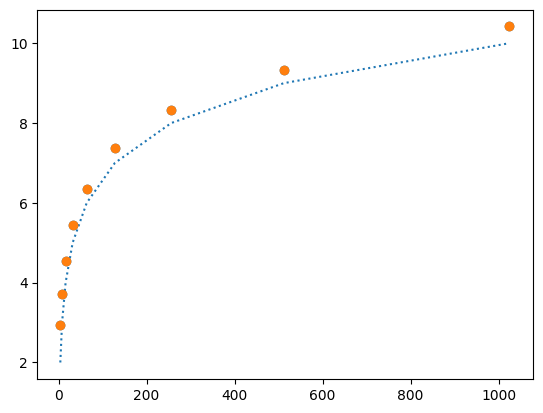

In [37]:
print(list_obs_avg,list_obs_var)

error=list_obs_var
predicted=np.log2(flipvalues)
plt.plot(flipvalues, predicted, linestyle = 'dotted')
plt.scatter(flipvalues, list_obs_avg)
plt.errorbar(flipvalues, list_obs_avg, xerr = error, fmt ='o')
plt.show()